In [1]:
# !!pip install gdown
!!pip install shap


['Collecting shap',
 '  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/f5/fc/e81722d6bec4fcba46e46ef895eddaeab0027ac71e78fc35ef351fac5fe4/shap-0.43.0-cp311-cp311-win_amd64.whl.metadata',
 '  Downloading shap-0.43.0-cp311-cp311-win_amd64.whl.metadata (24 kB)',
 'Requirement already satisfied: numpy in c:\\users\\lenovo\\appdata\\local\\programs\\python\\python311\\lib\\site-packages (from shap) (1.25.2)',
 'Requirement already satisfied: scipy in c:\\users\\lenovo\\appdata\\local\\programs\\python\\python311\\lib\\site-packages (from shap) (1.10.1)',
 'Requirement already satisfied: scikit-learn in c:\\users\\lenovo\\appdata\\local\\programs\\python\\python311\\lib\\site-packages (from shap) (1.3.0)',
 'Requirement already satisfied: pandas in c:\\users\\lenovo\\appdata\\local\\programs\\python\\python311\\lib\\site-packages (from shap) (2.0.2)',
 'Requirement already satisfied: tqdm>=4.27.0 in c:\\users\\lenovo\\appdata\\local\\programs\\python\\

In [60]:
# import gdown
# url = 'https://drive.google.com/drive/folders/110G_8HDeI9fQ7NW2ggkrgn6WYMZGmK07?usp=drive_link'
# files = gdown.download_folder(url, quiet=True)


In [62]:
import pandas as pd
import time
import joblib
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, BatchNormalization, GlobalAveragePooling1D
from keras.callbacks import ModelCheckpoint


In [63]:
tf.test.is_built_with_cuda()

True

In [64]:


def CNN_model(input_shape):
    model = keras.Sequential()

    model.add(Conv1D(1*16,(4),activation='relu',padding="same",input_shape=input_shape))
    model.add(Conv1D(1*16,(4),activation='relu'))
    model.add(Conv1D(1*16,(4),activation='relu'))
    model.add(MaxPool1D(2))
    model.add(BatchNormalization())
    model.add(Conv1D(2*16,(4),activation='relu'))
    model.add(Conv1D(2*16,(4),activation='relu'))
    model.add(Conv1D(2*16,(4),activation='relu'))
    model.add(MaxPool1D(2))
    model.add(BatchNormalization())
    model.add(Conv1D(4*16,(4),activation='relu'))
    model.add(Conv1D(4*16,(4),activation='relu'))
    model.add(Conv1D(4*16,(4),activation='relu'))
    model.add(MaxPool1D(2))
    model.add(Conv1D(2*16,(1),activation='relu'))
    model.add(Conv1D(4*16,(4),activation='relu'))
    model.add(Conv1D(4*16,(4),activation='relu'))
    model.add(MaxPool1D(2))
    model.add(BatchNormalization())
    model.add(Conv1D(8*16,(4),activation='relu'))
    model.add(Conv1D(8*16,(4),activation='relu'))
    model.add(Conv1D(8*16,(4),activation='relu'))
    model.add(MaxPool1D(2))
    model.add(Conv1D(16*16,(4),activation='relu'))
    model.add(Conv1D(16*16,(4),activation='relu'))
    model.add(Conv1D(16*16,(4),activation='relu'))
    model.add(MaxPool1D(2))
    model.add(BatchNormalization())
    model.add(Conv1D(4*16,(1),activation='relu'))
    model.add(Conv1D(8*16,(4),activation='relu'))
    model.add(Conv1D(8*16,(4),activation='relu'))
    model.add(MaxPool1D(2))
    model.add(BatchNormalization())
    model.add(Conv1D(16*16,(4),activation='relu'))
    model.add(Conv1D(16*16,(4),activation='relu'))
    model.add(Conv1D(16*16,(4),activation='relu'))
    model.add(MaxPool1D(2))
    model.add(BatchNormalization())
    model.add(Conv1D(32*16,(4),activation='relu'))
    model.add(Conv1D(32*16,(4),activation='relu'))
    model.add(Conv1D(32*16,(4),activation='relu'))
    model.add(MaxPool1D(2))

    model.add(GlobalAveragePooling1D())

    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=0.0002), loss='mean_squared_error')
    return model



In [65]:

def cnn_ml(data, label, checkpoint=False):
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.1, shuffle=True, random_state=17)

    model = CNN_model(data.shape[1:])
    # if checkpoint:
    #     checkpoint_filepath = './tmp/checkpoint'
    #     model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    #         filepath=checkpoint_filepath,
    #         save_weights_only=True,
    #         monitor='val_loss',
    #         mode='min',
    #         save_best_only=True)
    #     model.fit(X_train, y_train, batch_size=8, epochs=200, validation_data=(X_test, y_test), verbose=1, callbacks=[model_checkpoint_callback])
    # else:
    history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_data=(X_test, y_test), verbose=1)

    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)

    train_scores = mean_squared_error(y_train, train_prediction)
    test_scores = mean_squared_error(y_test, test_prediction)
    print(train_scores)
    print(test_scores)

    return history, model


In [66]:
data_type = '60'
data = pd.read_csv(f'/content/Plasma/ml_ready_data_{data_type}.csv')
n = data.shape[0]
label = pd.read_csv(f'/content/Plasma/mtt_labels_{data_type}.csv')['mtt48']

In [67]:

feature_scaler = MinMaxScaler()
label_scaler = MinMaxScaler()

scaled_data = feature_scaler.fit_transform(data)
scaled_label = label_scaler.fit_transform(label.values.reshape(-1, 1))

print(scaled_data.shape, scaled_label.shape)

(274, 8194) (274, 1)


In [68]:
# scaled_label

In [69]:
history, model = cnn_ml(scaled_data.reshape(n, 8194, 1), scaled_label)

Epoch 1/200
8/8 [==============================] - 20s 225ms/step - loss: 1.4505 - val_loss: 0.0604
Epoch 2/200
8/8 [==============================] - 1s 76ms/step - loss: 0.1249 - val_loss: 0.0548
Epoch 3/200
8/8 [==============================] - 1s 69ms/step - loss: 0.0516 - val_loss: 0.0530
Epoch 4/200
8/8 [==============================] - 1s 77ms/step - loss: 0.0356 - val_loss: 0.0504
Epoch 5/200
8/8 [==============================] - 1s 82ms/step - loss: 0.0323 - val_loss: 0.0469
Epoch 6/200
8/8 [==============================] - 1s 74ms/step - loss: 0.0281 - val_loss: 0.0463
Epoch 7/200
8/8 [==============================] - 1s 93ms/step - loss: 0.0239 - val_loss: 0.0431
Epoch 8/200
8/8 [==============================] - 1s 79ms/step - loss: 0.0238 - val_loss: 0.0427
Epoch 9/200
8/8 [==============================] - 1s 82ms/step - loss: 0.0187 - val_loss: 0.0404
Epoch 10/200
8/8 [==============================] - 1s 90ms/step - loss: 0.0171 - val_loss: 0.0386
Epoch 11/200
8/8 

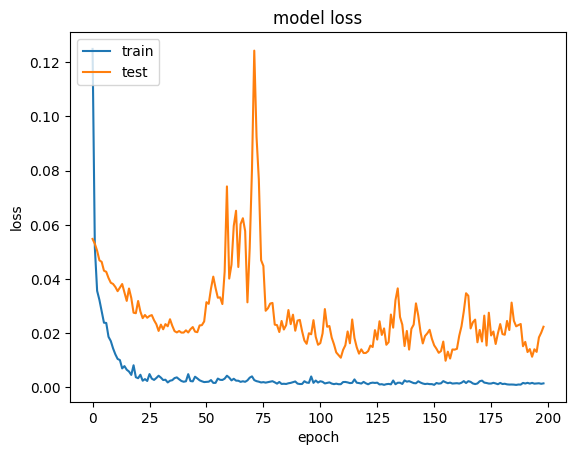

In [70]:

# summarize history for loss
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
import shap

# Python function to get model output; adjust this for your CNN model.
def f(x):
    return model.predict(x)

# Define a masker suitable for 1D data (using a default masker for now)
masker = shap.maskers.Independent(scaled_data)

# Create an explainer with the model and masker
explainer = shap.Explainer(f, masker)

# Here we explain a few spectra using a certain number of evaluations to estimate the SHAP values
shap_values = explainer(scaled_data[1:3], max_evals=100)



TypeError: ignored

In [ ]:
shap.plots.waterfall(shap_values[0])


In [ ]:
shap.plots.waterfall(shap_values[0])
